# Boost Models (XGBoost & LightGBM) with Santander Customer Satisfaction

## PreProcessing

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
train_df = pd.read_csv("/Users/jiwanhwang/Documents/GitHub/Practice_MachineLearning/santander-customer-satisfaction/train.csv")

In [3]:
train_df.shape

(76020, 371)

In [4]:
# test_df.shape

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [6]:
train_df.columns

Index(['ID', 'var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3',
       ...
       'saldo_medio_var33_hace2', 'saldo_medio_var33_hace3',
       'saldo_medio_var33_ult1', 'saldo_medio_var33_ult3',
       'saldo_medio_var44_hace2', 'saldo_medio_var44_hace3',
       'saldo_medio_var44_ult1', 'saldo_medio_var44_ult3', 'var38', 'TARGET'],
      dtype='object', length=371)

In [7]:
train_df['TARGET'].value_counts()

0    73012
1     3008
Name: TARGET, dtype: int64

In [8]:
one =  train_df['TARGET'][train_df['TARGET']==1].count()
total = train_df['TARGET'].count()

In [9]:
# (target value = 1)'s ratio
one/total

0.0395685345961589

In [10]:
train_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [11]:
def clean(df):
    df['var3'].replace(-999999, 2, inplace = True)
    df.drop('ID', axis = 1, inplace = True)
    return df.describe()
    
clean(train_df)

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,2.716483,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,3.160715,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,9.447971,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,95.268204,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,8237.820000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [12]:
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]
print('train_set_shape: {}'.format(X_train.shape))

train_set_shape: (76020, 369)


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

## XGBoost (SciKit Learn Wrapper)

In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

In [17]:
xgb_clf = XGBClassifier(n_estimators = 500, random_state = 23)
xgb_clf.fit(X_train, y_train, early_stopping_rounds = 100, 
           eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_socre = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:, 1], average='macro')
print('ROC_AUC: {:.4f}'.format(xgb_roc_socre))

[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

In [22]:
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators = 100)

In [26]:
params = {'max_depth':[5, 7], 'min_child_weight':[1, 3], 'colsample_bytree':[0.5, 0.75]}

grid = GridSearchCV(xgb_clf, param_grid = params)
grid.fit(X_train, y_train, early_stopping_rounds=30, eval_metric = "auc", 
         eval_set=[(X_train, y_train), (X_test, y_test)])
print('GridSearchCV Best Parameter: ', grid.best_params_)


/Users/jiwanhwang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0]	validation_0-auc:0.722196	validation_1-auc:0.727319
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.734627	validation_1-auc:0.738666
[2]	validation_0-auc:0.796925	validation_1-auc:0.800096
[3]	validation_0-auc:0.806833	validation_1-auc:0.810166
[4]	validation_0-auc:0.816994	validation_1-auc:0.818822
[5]	validation_0-auc:0.822156	validation_1-auc:0.824706
[6]	validation_0-auc:0.815975	validation_1-auc:0.81806
[7]	validation_0-auc:0.82537	validation_1-auc:0.824586
[8]	validation_0-auc:0.820067	validation_1-auc:0.81991
[9]	validation_0-auc:0.815942	validation_1-auc:0.817545
[10]	validation_0-auc:0.82344	validation_1-auc:0.824051
[11]	validation_0-auc:0.829401	validation_1-auc:0.828552
[12]	validation_0-auc:0.832124	validation_1-auc:0.832141
[13]	validation_0-auc:0.830658	validation_1-auc:0.830756
[14]	validation_0-auc:0.826655	validation_1-auc:0.827547
[1

[52]	validation_0-auc:0.863615	validation_1-auc:0.845387
[53]	validation_0-auc:0.864196	validation_1-auc:0.845225
[54]	validation_0-auc:0.864877	validation_1-auc:0.845704
[55]	validation_0-auc:0.865623	validation_1-auc:0.845856
[56]	validation_0-auc:0.866245	validation_1-auc:0.845706
[57]	validation_0-auc:0.866744	validation_1-auc:0.845688
[58]	validation_0-auc:0.867269	validation_1-auc:0.845733
[59]	validation_0-auc:0.867521	validation_1-auc:0.845862
[60]	validation_0-auc:0.867647	validation_1-auc:0.845845
[61]	validation_0-auc:0.867915	validation_1-auc:0.845791
[62]	validation_0-auc:0.868267	validation_1-auc:0.845643
[63]	validation_0-auc:0.868603	validation_1-auc:0.84572
[64]	validation_0-auc:0.86906	validation_1-auc:0.845417
[65]	validation_0-auc:0.869351	validation_1-auc:0.845569
[66]	validation_0-auc:0.869528	validation_1-auc:0.845547
[67]	validation_0-auc:0.869859	validation_1-auc:0.84557
[68]	validation_0-auc:0.870085	validation_1-auc:0.84561
[69]	validation_0-auc:0.870277	vali

[94]	validation_0-auc:0.874835	validation_1-auc:0.842949
[95]	validation_0-auc:0.875091	validation_1-auc:0.843065
[96]	validation_0-auc:0.875145	validation_1-auc:0.8431
[97]	validation_0-auc:0.875163	validation_1-auc:0.843158
[98]	validation_0-auc:0.875459	validation_1-auc:0.84334
[99]	validation_0-auc:0.875506	validation_1-auc:0.843251
[0]	validation_0-auc:0.722066	validation_1-auc:0.727229
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.738018	validation_1-auc:0.740393
[2]	validation_0-auc:0.804351	validation_1-auc:0.805954
[3]	validation_0-auc:0.813292	validation_1-auc:0.815981
[4]	validation_0-auc:0.819533	validation_1-auc:0.821282
[5]	validation_0-auc:0.823599	validation_1-auc:0.825532
[6]	validation_0-auc:0.816122	validation_1-auc:0.819008
[7]	validation_0-auc:0.823623	validation_1-auc:0.824128
[8]	validation_0-auc:0.820624	validation_1-auc:0.821328


[47]	validation_0-auc:0.859955	validation_1-auc:0.844961
[48]	validation_0-auc:0.860011	validation_1-auc:0.844933
[49]	validation_0-auc:0.860484	validation_1-auc:0.844955
[50]	validation_0-auc:0.860764	validation_1-auc:0.845118
[51]	validation_0-auc:0.860977	validation_1-auc:0.845045
[52]	validation_0-auc:0.861435	validation_1-auc:0.84469
[53]	validation_0-auc:0.861725	validation_1-auc:0.844572
[54]	validation_0-auc:0.862368	validation_1-auc:0.844764
[55]	validation_0-auc:0.863013	validation_1-auc:0.844854
[56]	validation_0-auc:0.863696	validation_1-auc:0.844626
[57]	validation_0-auc:0.864031	validation_1-auc:0.844785
[58]	validation_0-auc:0.86445	validation_1-auc:0.844664
[59]	validation_0-auc:0.864758	validation_1-auc:0.84494
[60]	validation_0-auc:0.865046	validation_1-auc:0.845162
[61]	validation_0-auc:0.865408	validation_1-auc:0.845025
[62]	validation_0-auc:0.865579	validation_1-auc:0.844917
[63]	validation_0-auc:0.865861	validation_1-auc:0.844766
[64]	validation_0-auc:0.866226	val

[97]	validation_0-auc:0.871975	validation_1-auc:0.843618
[98]	validation_0-auc:0.87216	validation_1-auc:0.843716
[99]	validation_0-auc:0.872445	validation_1-auc:0.84359
[0]	validation_0-auc:0.724391	validation_1-auc:0.727365
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.738742	validation_1-auc:0.738169
[2]	validation_0-auc:0.804491	validation_1-auc:0.801331
[3]	validation_0-auc:0.81765	validation_1-auc:0.815022
[4]	validation_0-auc:0.828165	validation_1-auc:0.824188
[5]	validation_0-auc:0.831954	validation_1-auc:0.828839
[6]	validation_0-auc:0.825603	validation_1-auc:0.823018
[7]	validation_0-auc:0.833273	validation_1-auc:0.828249
[8]	validation_0-auc:0.830077	validation_1-auc:0.824989
[9]	validation_0-auc:0.828138	validation_1-auc:0.821393
[10]	validation_0-auc:0.8356	validation_1-auc:0.827882
[11]	validation_0-auc:0.839715	validation_1-auc:0.831457
[12

[52]	validation_0-auc:0.883698	validation_1-auc:0.845513
[53]	validation_0-auc:0.884103	validation_1-auc:0.845379
[54]	validation_0-auc:0.884579	validation_1-auc:0.845142
[55]	validation_0-auc:0.885291	validation_1-auc:0.845211
[56]	validation_0-auc:0.885727	validation_1-auc:0.845436
[57]	validation_0-auc:0.886259	validation_1-auc:0.845432
[58]	validation_0-auc:0.886818	validation_1-auc:0.845236
[59]	validation_0-auc:0.886997	validation_1-auc:0.845248
[60]	validation_0-auc:0.887115	validation_1-auc:0.845298
[61]	validation_0-auc:0.887323	validation_1-auc:0.845285
[62]	validation_0-auc:0.887608	validation_1-auc:0.845066
[63]	validation_0-auc:0.888077	validation_1-auc:0.845029
[64]	validation_0-auc:0.888584	validation_1-auc:0.84486
[65]	validation_0-auc:0.888792	validation_1-auc:0.845026
[66]	validation_0-auc:0.888928	validation_1-auc:0.845049
[67]	validation_0-auc:0.889276	validation_1-auc:0.844879
[68]	validation_0-auc:0.889483	validation_1-auc:0.844815
[69]	validation_0-auc:0.889673	v

[22]	validation_0-auc:0.851638	validation_1-auc:0.836923
[23]	validation_0-auc:0.850763	validation_1-auc:0.835558
[24]	validation_0-auc:0.851003	validation_1-auc:0.834288
[25]	validation_0-auc:0.851323	validation_1-auc:0.832823
[26]	validation_0-auc:0.854205	validation_1-auc:0.834649
[27]	validation_0-auc:0.854389	validation_1-auc:0.833689
[28]	validation_0-auc:0.856704	validation_1-auc:0.834981
[29]	validation_0-auc:0.858942	validation_1-auc:0.835809
[30]	validation_0-auc:0.859164	validation_1-auc:0.834996
[31]	validation_0-auc:0.858706	validation_1-auc:0.833931
[32]	validation_0-auc:0.861433	validation_1-auc:0.835058
[33]	validation_0-auc:0.863515	validation_1-auc:0.836044
[34]	validation_0-auc:0.865782	validation_1-auc:0.836541
[35]	validation_0-auc:0.865891	validation_1-auc:0.835812
[36]	validation_0-auc:0.867579	validation_1-auc:0.83707
[37]	validation_0-auc:0.868512	validation_1-auc:0.836929
[38]	validation_0-auc:0.869163	validation_1-auc:0.837718
[39]	validation_0-auc:0.86901	va

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.744241	validation_1-auc:0.744834
[2]	validation_0-auc:0.817067	validation_1-auc:0.815013
[3]	validation_0-auc:0.827635	validation_1-auc:0.822521
[4]	validation_0-auc:0.833183	validation_1-auc:0.827331
[5]	validation_0-auc:0.837562	validation_1-auc:0.831832
[6]	validation_0-auc:0.837668	validation_1-auc:0.830183
[7]	validation_0-auc:0.840019	validation_1-auc:0.830929
[8]	validation_0-auc:0.840688	validation_1-auc:0.830663
[9]	validation_0-auc:0.838062	validation_1-auc:0.829081
[10]	validation_0-auc:0.842272	validation_1-auc:0.83177
[11]	validation_0-auc:0.845153	validation_1-auc:0.833522
[12]	validation_0-auc:0.847324	validation_1-auc:0.835873
[13]	validation_0-auc:0.846467	validation_1-auc:0.834369
[14]	validation_0-auc:0.845877	validation_1-auc:0.832778
[15]	validation_0-auc:0.848705	validation_1-auc:0.834133
[16]	validation_0-auc:0.848319	validation_1-auc:0.832893
[17]	validation_0-auc:0.849346	val

[55]	validation_0-auc:0.863337	validation_1-auc:0.839406
[56]	validation_0-auc:0.863465	validation_1-auc:0.839524
[57]	validation_0-auc:0.863772	validation_1-auc:0.839405
[58]	validation_0-auc:0.864232	validation_1-auc:0.839204
[59]	validation_0-auc:0.86457	validation_1-auc:0.839326
[60]	validation_0-auc:0.864887	validation_1-auc:0.838997
[61]	validation_0-auc:0.865216	validation_1-auc:0.838909
[62]	validation_0-auc:0.865897	validation_1-auc:0.838957
Stopping. Best iteration:
[32]	validation_0-auc:0.852133	validation_1-auc:0.840984

[0]	validation_0-auc:0.727663	validation_1-auc:0.734372
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.741882	validation_1-auc:0.747952
[2]	validation_0-auc:0.804701	validation_1-auc:0.809341
[3]	validation_0-auc:0.816388	validation_1-auc:0.822734
[4]	validation_0-auc:0.827214	validation_1-auc:0.82897
[5]	validation_0-auc:0.82

[56]	validation_0-auc:0.866756	validation_1-auc:0.843666
[57]	validation_0-auc:0.867009	validation_1-auc:0.843687
[58]	validation_0-auc:0.867583	validation_1-auc:0.84348
[59]	validation_0-auc:0.867671	validation_1-auc:0.843357
[60]	validation_0-auc:0.868239	validation_1-auc:0.843217
[61]	validation_0-auc:0.868558	validation_1-auc:0.842921
[62]	validation_0-auc:0.868794	validation_1-auc:0.842845
[63]	validation_0-auc:0.869265	validation_1-auc:0.842847
[64]	validation_0-auc:0.869447	validation_1-auc:0.842801
[65]	validation_0-auc:0.869939	validation_1-auc:0.842727
[66]	validation_0-auc:0.870224	validation_1-auc:0.843014
[67]	validation_0-auc:0.870683	validation_1-auc:0.842758
[68]	validation_0-auc:0.871174	validation_1-auc:0.842683
[69]	validation_0-auc:0.871401	validation_1-auc:0.842426
[70]	validation_0-auc:0.871802	validation_1-auc:0.84301
[71]	validation_0-auc:0.872044	validation_1-auc:0.842947
[72]	validation_0-auc:0.872237	validation_1-auc:0.843194
[73]	validation_0-auc:0.872312	va

[43]	validation_0-auc:0.859948	validation_1-auc:0.842967
[44]	validation_0-auc:0.860098	validation_1-auc:0.84288
[45]	validation_0-auc:0.860498	validation_1-auc:0.843008
[46]	validation_0-auc:0.8608	validation_1-auc:0.843066
[47]	validation_0-auc:0.861331	validation_1-auc:0.843186
[48]	validation_0-auc:0.861671	validation_1-auc:0.843537
[49]	validation_0-auc:0.862049	validation_1-auc:0.843756
[50]	validation_0-auc:0.862337	validation_1-auc:0.843497
[51]	validation_0-auc:0.862831	validation_1-auc:0.84319
[52]	validation_0-auc:0.862897	validation_1-auc:0.84335
[53]	validation_0-auc:0.863118	validation_1-auc:0.842873
[54]	validation_0-auc:0.863603	validation_1-auc:0.842935
[55]	validation_0-auc:0.864004	validation_1-auc:0.842966
[56]	validation_0-auc:0.864269	validation_1-auc:0.842989
[57]	validation_0-auc:0.864558	validation_1-auc:0.843124
[58]	validation_0-auc:0.865079	validation_1-auc:0.842835
[59]	validation_0-auc:0.865225	validation_1-auc:0.842929
[60]	validation_0-auc:0.865447	valid

[25]	validation_0-auc:0.86104	validation_1-auc:0.836142
[26]	validation_0-auc:0.863143	validation_1-auc:0.837016
[27]	validation_0-auc:0.865065	validation_1-auc:0.838056
[28]	validation_0-auc:0.866598	validation_1-auc:0.838985
[29]	validation_0-auc:0.867445	validation_1-auc:0.839448
[30]	validation_0-auc:0.868273	validation_1-auc:0.840237
[31]	validation_0-auc:0.868552	validation_1-auc:0.839934
[32]	validation_0-auc:0.869824	validation_1-auc:0.839546
[33]	validation_0-auc:0.871061	validation_1-auc:0.839274
[34]	validation_0-auc:0.871961	validation_1-auc:0.839414
[35]	validation_0-auc:0.873119	validation_1-auc:0.839131
[36]	validation_0-auc:0.874205	validation_1-auc:0.839051
[37]	validation_0-auc:0.875173	validation_1-auc:0.838454
[38]	validation_0-auc:0.875799	validation_1-auc:0.838118
[39]	validation_0-auc:0.87657	validation_1-auc:0.837868
[40]	validation_0-auc:0.877488	validation_1-auc:0.837614
[41]	validation_0-auc:0.878303	validation_1-auc:0.837691
[42]	validation_0-auc:0.879311	va

[27]	validation_0-auc:0.867949	validation_1-auc:0.838735
[28]	validation_0-auc:0.869477	validation_1-auc:0.838997
[29]	validation_0-auc:0.870978	validation_1-auc:0.839626
[30]	validation_0-auc:0.872181	validation_1-auc:0.839457
[31]	validation_0-auc:0.872515	validation_1-auc:0.840029
[32]	validation_0-auc:0.873985	validation_1-auc:0.839723
[33]	validation_0-auc:0.875434	validation_1-auc:0.839326
[34]	validation_0-auc:0.876422	validation_1-auc:0.839343
[35]	validation_0-auc:0.877284	validation_1-auc:0.83905
[36]	validation_0-auc:0.878091	validation_1-auc:0.839564
[37]	validation_0-auc:0.879494	validation_1-auc:0.839373
[38]	validation_0-auc:0.880387	validation_1-auc:0.8401
[39]	validation_0-auc:0.880613	validation_1-auc:0.84033
[40]	validation_0-auc:0.881038	validation_1-auc:0.839998
[41]	validation_0-auc:0.881446	validation_1-auc:0.840132
[42]	validation_0-auc:0.882144	validation_1-auc:0.840283
[43]	validation_0-auc:0.882817	validation_1-auc:0.840408
[44]	validation_0-auc:0.883273	vali

[20]	validation_0-auc:0.859755	validation_1-auc:0.841057
[21]	validation_0-auc:0.861045	validation_1-auc:0.840823
[22]	validation_0-auc:0.861299	validation_1-auc:0.840585
[23]	validation_0-auc:0.8628	validation_1-auc:0.840956
[24]	validation_0-auc:0.862496	validation_1-auc:0.840996
[25]	validation_0-auc:0.861695	validation_1-auc:0.839797
[26]	validation_0-auc:0.863491	validation_1-auc:0.839826
[27]	validation_0-auc:0.864652	validation_1-auc:0.840647
[28]	validation_0-auc:0.866273	validation_1-auc:0.839676
[29]	validation_0-auc:0.867251	validation_1-auc:0.839784
[30]	validation_0-auc:0.867844	validation_1-auc:0.839736
[31]	validation_0-auc:0.867916	validation_1-auc:0.839961
[32]	validation_0-auc:0.868653	validation_1-auc:0.840119
[33]	validation_0-auc:0.869303	validation_1-auc:0.839819
[34]	validation_0-auc:0.870228	validation_1-auc:0.840266
[35]	validation_0-auc:0.871014	validation_1-auc:0.84056
[36]	validation_0-auc:0.872001	validation_1-auc:0.840888
[37]	validation_0-auc:0.872844	val

[80]	validation_0-auc:0.887246	validation_1-auc:0.841529
[81]	validation_0-auc:0.8873	validation_1-auc:0.841452
[82]	validation_0-auc:0.887414	validation_1-auc:0.841426
[83]	validation_0-auc:0.887465	validation_1-auc:0.841212
[84]	validation_0-auc:0.887835	validation_1-auc:0.841357
[85]	validation_0-auc:0.887907	validation_1-auc:0.841228
[86]	validation_0-auc:0.888286	validation_1-auc:0.841311
[87]	validation_0-auc:0.888302	validation_1-auc:0.841296
[88]	validation_0-auc:0.888469	validation_1-auc:0.841141
[89]	validation_0-auc:0.888471	validation_1-auc:0.84125
[90]	validation_0-auc:0.888496	validation_1-auc:0.841248
[91]	validation_0-auc:0.888811	validation_1-auc:0.841175
[92]	validation_0-auc:0.888888	validation_1-auc:0.841117
[93]	validation_0-auc:0.888977	validation_1-auc:0.841033
[94]	validation_0-auc:0.889543	validation_1-auc:0.841451
[95]	validation_0-auc:0.889635	validation_1-auc:0.841264
[96]	validation_0-auc:0.889788	validation_1-auc:0.841158
Stopping. Best iteration:
[66]	val

In [29]:
grid_proba = grid.predict_proba(X_test)[:,1]
xgb_roc_socre = roc_auc_score(y_test, grid_proba, average = 'macro')
xgb_roc_socre

0.8438444125931812

In [30]:
xgb_clf = XGBClassifier(n_estimators=1000, learning_rate =0.2, max_depth=5,
                       min_child_weight= 1, colsample_bytree=0.75, reg_alpha=0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', 
            eval_set=[(X_train, y_train), (X_test, y_test)])


[0]	validation_0-auc:0.735871	validation_1-auc:0.743704
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.752592	validation_1-auc:0.759562
[2]	validation_0-auc:0.816538	validation_1-auc:0.817906
[3]	validation_0-auc:0.830859	validation_1-auc:0.830601
[4]	validation_0-auc:0.835457	validation_1-auc:0.834173
[5]	validation_0-auc:0.841474	validation_1-auc:0.835858
[6]	validation_0-auc:0.839946	validation_1-auc:0.832973
[7]	validation_0-auc:0.842635	validation_1-auc:0.834468
[8]	validation_0-auc:0.84205	validation_1-auc:0.831056
[9]	validation_0-auc:0.841497	validation_1-auc:0.830814
[10]	validation_0-auc:0.847184	validation_1-auc:0.834759
[11]	validation_0-auc:0.849959	validation_1-auc:0.836476
[12]	validation_0-auc:0.85337	validation_1-auc:0.838745
[13]	validation_0-auc:0.85271	validation_1-auc:0.839353
[14]	validation_0-auc:0.855754	validation_1-auc:0.839737


[142]	validation_0-auc:0.913536	validation_1-auc:0.835881
[143]	validation_0-auc:0.913584	validation_1-auc:0.835731
[144]	validation_0-auc:0.913602	validation_1-auc:0.835744
[145]	validation_0-auc:0.913647	validation_1-auc:0.835903
[146]	validation_0-auc:0.913939	validation_1-auc:0.836103
[147]	validation_0-auc:0.914493	validation_1-auc:0.835708
[148]	validation_0-auc:0.915052	validation_1-auc:0.835623
[149]	validation_0-auc:0.915235	validation_1-auc:0.835267
[150]	validation_0-auc:0.915307	validation_1-auc:0.835176
[151]	validation_0-auc:0.915613	validation_1-auc:0.835321
[152]	validation_0-auc:0.915779	validation_1-auc:0.835066
[153]	validation_0-auc:0.916169	validation_1-auc:0.834841
[154]	validation_0-auc:0.916439	validation_1-auc:0.834794
[155]	validation_0-auc:0.91697	validation_1-auc:0.83538
[156]	validation_0-auc:0.917148	validation_1-auc:0.835166
[157]	validation_0-auc:0.917473	validation_1-auc:0.834911
[158]	validation_0-auc:0.917786	validation_1-auc:0.834879
[159]	validation

AttributeError: 'XGBClassifier' object has no attribute 'predic_proba'

In [31]:
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')

xgb_roc_score

0.8448973085441975

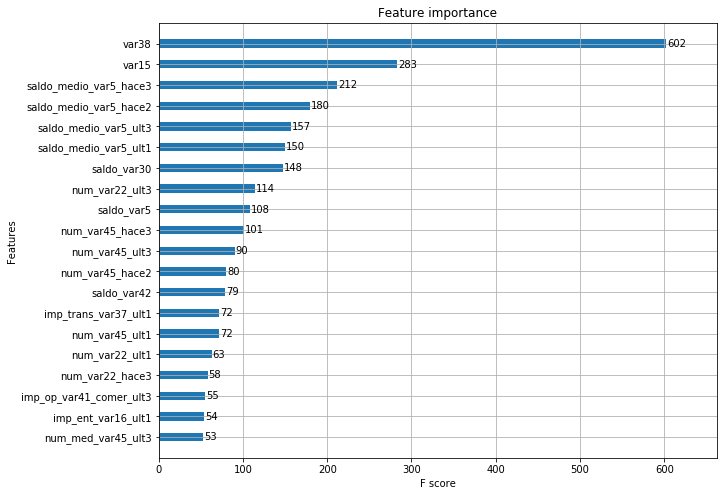

In [32]:
from xgboost import plot_importance

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

# LightGBM

In [38]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_test, y_test)])
             
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
lgbm_roc_score

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration is:
[42]	valid_0's auc: 0.839599	valid_0's binary_logloss: 0.139408


0.8395993236177357

In [40]:
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves':[32,64],
         'max_depth':[128, 160],
         'min_child_samples':[60, 100],
         'subsample':[0.8, 1]}
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train, y_train), (X_test, y_test)])

lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
lgbm_roc_score

/Users/jiwanhwang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	va

[44]	valid_0's auc: 0.883618	valid_0's binary_logloss: 0.120726	valid_1's auc: 0.838905	valid_1's binary_logloss: 0.139592
[45]	valid_0's auc: 0.88419	valid_0's binary_logloss: 0.120513	valid_1's auc: 0.838587	valid_1's binary_logloss: 0.139651
[46]	valid_0's auc: 0.884555	valid_0's binary_logloss: 0.120339	valid_1's auc: 0.838288	valid_1's binary_logloss: 0.139703
[47]	valid_0's auc: 0.884789	valid_0's binary_logloss: 0.120189	valid_1's auc: 0.838155	valid_1's binary_logloss: 0.139692
[48]	valid_0's auc: 0.884968	valid_0's binary_logloss: 0.120074	valid_1's auc: 0.8384	valid_1's binary_logloss: 0.139667
[49]	valid_0's auc: 0.885336	valid_0's binary_logloss: 0.119939	valid_1's auc: 0.83827	valid_1's binary_logloss: 0.13968
[50]	valid_0's auc: 0.885759	valid_0's binary_logloss: 0.119734	valid_1's auc: 0.838029	valid_1's binary_logloss: 0.139727
[51]	valid_0's auc: 0.886206	valid_0's binary_logloss: 0.119595	valid_1's auc: 0.838077	valid_1's binary_logloss: 0.13975
[52]	valid_0's auc: 0.

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	va

[47]	valid_0's auc: 0.884789	valid_0's binary_logloss: 0.120189	valid_1's auc: 0.838155	valid_1's binary_logloss: 0.139692
[48]	valid_0's auc: 0.884968	valid_0's binary_logloss: 0.120074	valid_1's auc: 0.8384	valid_1's binary_logloss: 0.139667
[49]	valid_0's auc: 0.885336	valid_0's binary_logloss: 0.119939	valid_1's auc: 0.83827	valid_1's binary_logloss: 0.13968
[50]	valid_0's auc: 0.885759	valid_0's binary_logloss: 0.119734	valid_1's auc: 0.838029	valid_1's binary_logloss: 0.139727
[51]	valid_0's auc: 0.886206	valid_0's binary_logloss: 0.119595	valid_1's auc: 0.838077	valid_1's binary_logloss: 0.13975
[52]	valid_0's auc: 0.886527	valid_0's binary_logloss: 0.119458	valid_1's auc: 0.838081	valid_1's binary_logloss: 0.139779
[53]	valid_0's auc: 0.886808	valid_0's binary_logloss: 0.119271	valid_1's auc: 0.838632	valid_1's binary_logloss: 0.139643
[54]	valid_0's auc: 0.887203	valid_0's binary_logloss: 0.119092	valid_1's auc: 0.838634	valid_1's binary_logloss: 0.139662
[55]	valid_0's auc: 0

[1]	valid_0's auc: 0.832891	valid_0's binary_logloss: 0.155301	valid_1's auc: 0.818851	valid_1's binary_logloss: 0.164831
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845606	valid_0's binary_logloss: 0.149818	valid_1's auc: 0.826972	valid_1's binary_logloss: 0.159925
[3]	valid_0's auc: 0.850188	valid_0's binary_logloss: 0.145683	valid_1's auc: 0.828704	valid_1's binary_logloss: 0.156313
[4]	valid_0's auc: 0.85231	valid_0's binary_logloss: 0.142507	valid_1's auc: 0.829069	valid_1's binary_logloss: 0.153533
[5]	valid_0's auc: 0.854335	valid_0's binary_logloss: 0.139906	valid_1's auc: 0.832066	valid_1's binary_logloss: 0.151309
[6]	valid_0's auc: 0.857012	valid_0's binary_logloss: 0.137695	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.14943
[7]	valid_0's auc: 0.858925	valid_0's binary_logloss: 0.135794	valid_1's auc: 0.834545	valid_1's binary_logloss: 0.147904
[8]	valid_0's auc: 0.861608	valid_0's binary_logloss: 0.134145	valid_1's auc: 0.833797	

[31]	valid_0's auc: 0.893688	valid_0's binary_logloss: 0.117412	valid_1's auc: 0.83732	valid_1's binary_logloss: 0.139721
[32]	valid_0's auc: 0.894643	valid_0's binary_logloss: 0.117013	valid_1's auc: 0.8373	valid_1's binary_logloss: 0.1397
[33]	valid_0's auc: 0.89555	valid_0's binary_logloss: 0.11666	valid_1's auc: 0.837425	valid_1's binary_logloss: 0.139692
[34]	valid_0's auc: 0.896334	valid_0's binary_logloss: 0.116252	valid_1's auc: 0.836971	valid_1's binary_logloss: 0.139746
[35]	valid_0's auc: 0.897058	valid_0's binary_logloss: 0.115923	valid_1's auc: 0.837212	valid_1's binary_logloss: 0.139756
[36]	valid_0's auc: 0.897581	valid_0's binary_logloss: 0.115642	valid_1's auc: 0.837227	valid_1's binary_logloss: 0.139719
[37]	valid_0's auc: 0.898111	valid_0's binary_logloss: 0.115297	valid_1's auc: 0.83733	valid_1's binary_logloss: 0.139758
[38]	valid_0's auc: 0.898762	valid_0's binary_logloss: 0.11499	valid_1's auc: 0.837353	valid_1's binary_logloss: 0.13975
[39]	valid_0's auc: 0.8994

[17]	valid_0's auc: 0.875722	valid_0's binary_logloss: 0.125162	valid_1's auc: 0.832021	valid_1's binary_logloss: 0.142052
[18]	valid_0's auc: 0.877178	valid_0's binary_logloss: 0.124543	valid_1's auc: 0.831549	valid_1's binary_logloss: 0.141895
[19]	valid_0's auc: 0.877995	valid_0's binary_logloss: 0.123978	valid_1's auc: 0.831242	valid_1's binary_logloss: 0.141804
[20]	valid_0's auc: 0.87956	valid_0's binary_logloss: 0.123373	valid_1's auc: 0.83106	valid_1's binary_logloss: 0.141701
[21]	valid_0's auc: 0.880405	valid_0's binary_logloss: 0.122832	valid_1's auc: 0.830305	valid_1's binary_logloss: 0.14165
[22]	valid_0's auc: 0.881423	valid_0's binary_logloss: 0.122355	valid_1's auc: 0.830239	valid_1's binary_logloss: 0.141656
[23]	valid_0's auc: 0.882393	valid_0's binary_logloss: 0.121843	valid_1's auc: 0.830552	valid_1's binary_logloss: 0.141537
[24]	valid_0's auc: 0.884118	valid_0's binary_logloss: 0.121284	valid_1's auc: 0.830946	valid_1's binary_logloss: 0.141426
[25]	valid_0's auc:

[1]	valid_0's auc: 0.830649	valid_0's binary_logloss: 0.155755	valid_1's auc: 0.81673	valid_1's binary_logloss: 0.164976
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.839656	valid_0's binary_logloss: 0.150015	valid_1's auc: 0.822663	valid_1's binary_logloss: 0.159866
[3]	valid_0's auc: 0.847827	valid_0's binary_logloss: 0.145888	valid_1's auc: 0.829595	valid_1's binary_logloss: 0.156171
[4]	valid_0's auc: 0.851153	valid_0's binary_logloss: 0.142542	valid_1's auc: 0.831052	valid_1's binary_logloss: 0.153261
[5]	valid_0's auc: 0.854418	valid_0's binary_logloss: 0.139824	valid_1's auc: 0.832726	valid_1's binary_logloss: 0.150974
[6]	valid_0's auc: 0.85615	valid_0's binary_logloss: 0.137634	valid_1's auc: 0.835578	valid_1's binary_logloss: 0.148988
[7]	valid_0's auc: 0.857116	valid_0's binary_logloss: 0.135891	valid_1's auc: 0.834971	valid_1's binary_logloss: 0.147626
[8]	valid_0's auc: 0.859522	valid_0's binary_logloss: 0.134235	valid_1's auc: 0.836528	

[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156469	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165188
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830014	valid_0's binary_logloss: 0.151109	valid_1's auc: 0.823491	valid_1's binary_logloss: 0.159651
[3]	valid_0's auc: 0.839606	valid_0's binary_logloss: 0.147325	valid_1's auc: 0.832736	valid_1's binary_logloss: 0.156031
[4]	valid_0's auc: 0.842933	valid_0's binary_logloss: 0.144392	valid_1's auc: 0.836202	valid_1's binary_logloss: 0.15311
[5]	valid_0's auc: 0.845714	valid_0's binary_logloss: 0.141965	valid_1's auc: 0.838652	valid_1's binary_logloss: 0.150749
[6]	valid_0's auc: 0.848431	valid_0's binary_logloss: 0.13995	valid_1's auc: 0.840279	valid_1's binary_logloss: 0.148948
[7]	valid_0's auc: 0.849908	valid_0's binary_logloss: 0.138315	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.14741
[8]	valid_0's auc: 0.852054	valid_0's binary_logloss: 0.136907	valid_1's auc: 0.83901	va

[40]	valid_0's auc: 0.877543	valid_0's binary_logloss: 0.123003	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.139144
[41]	valid_0's auc: 0.877994	valid_0's binary_logloss: 0.122806	valid_1's auc: 0.839925	valid_1's binary_logloss: 0.139157
[42]	valid_0's auc: 0.878413	valid_0's binary_logloss: 0.122608	valid_1's auc: 0.839588	valid_1's binary_logloss: 0.139183
[43]	valid_0's auc: 0.87868	valid_0's binary_logloss: 0.122482	valid_1's auc: 0.839828	valid_1's binary_logloss: 0.139122
[44]	valid_0's auc: 0.878844	valid_0's binary_logloss: 0.122346	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.139112
[45]	valid_0's auc: 0.879115	valid_0's binary_logloss: 0.12219	valid_1's auc: 0.839862	valid_1's binary_logloss: 0.139105
[46]	valid_0's auc: 0.879426	valid_0's binary_logloss: 0.122041	valid_1's auc: 0.839926	valid_1's binary_logloss: 0.139086
[47]	valid_0's auc: 0.879882	valid_0's binary_logloss: 0.121829	valid_1's auc: 0.840044	valid_1's binary_logloss: 0.139063
[48]	valid_0's auc

[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156469	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165188
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830014	valid_0's binary_logloss: 0.151109	valid_1's auc: 0.823491	valid_1's binary_logloss: 0.159651
[3]	valid_0's auc: 0.839606	valid_0's binary_logloss: 0.147325	valid_1's auc: 0.832736	valid_1's binary_logloss: 0.156031
[4]	valid_0's auc: 0.842933	valid_0's binary_logloss: 0.144392	valid_1's auc: 0.836202	valid_1's binary_logloss: 0.15311
[5]	valid_0's auc: 0.845714	valid_0's binary_logloss: 0.141965	valid_1's auc: 0.838652	valid_1's binary_logloss: 0.150749
[6]	valid_0's auc: 0.848431	valid_0's binary_logloss: 0.13995	valid_1's auc: 0.840279	valid_1's binary_logloss: 0.148948
[7]	valid_0's auc: 0.849908	valid_0's binary_logloss: 0.138315	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.14741
[8]	valid_0's auc: 0.852054	valid_0's binary_logloss: 0.136907	valid_1's auc: 0.83901	va

[39]	valid_0's auc: 0.877193	valid_0's binary_logloss: 0.123186	valid_1's auc: 0.84006	valid_1's binary_logloss: 0.139095
[40]	valid_0's auc: 0.877543	valid_0's binary_logloss: 0.123003	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.139144
[41]	valid_0's auc: 0.877994	valid_0's binary_logloss: 0.122806	valid_1's auc: 0.839925	valid_1's binary_logloss: 0.139157
[42]	valid_0's auc: 0.878413	valid_0's binary_logloss: 0.122608	valid_1's auc: 0.839588	valid_1's binary_logloss: 0.139183
[43]	valid_0's auc: 0.87868	valid_0's binary_logloss: 0.122482	valid_1's auc: 0.839828	valid_1's binary_logloss: 0.139122
[44]	valid_0's auc: 0.878844	valid_0's binary_logloss: 0.122346	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.139112
[45]	valid_0's auc: 0.879115	valid_0's binary_logloss: 0.12219	valid_1's auc: 0.839862	valid_1's binary_logloss: 0.139105
[46]	valid_0's auc: 0.879426	valid_0's binary_logloss: 0.122041	valid_1's auc: 0.839926	valid_1's binary_logloss: 0.139086
[47]	valid_0's auc:

[33]	valid_0's auc: 0.888164	valid_0's binary_logloss: 0.11928	valid_1's auc: 0.830667	valid_1's binary_logloss: 0.140953
[34]	valid_0's auc: 0.888957	valid_0's binary_logloss: 0.118937	valid_1's auc: 0.830222	valid_1's binary_logloss: 0.141016
[35]	valid_0's auc: 0.889746	valid_0's binary_logloss: 0.118573	valid_1's auc: 0.830175	valid_1's binary_logloss: 0.141039
[36]	valid_0's auc: 0.890215	valid_0's binary_logloss: 0.118288	valid_1's auc: 0.830319	valid_1's binary_logloss: 0.140986
[37]	valid_0's auc: 0.890966	valid_0's binary_logloss: 0.117947	valid_1's auc: 0.830443	valid_1's binary_logloss: 0.140993
[38]	valid_0's auc: 0.891474	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.830505	valid_1's binary_logloss: 0.141016
[39]	valid_0's auc: 0.892156	valid_0's binary_logloss: 0.117328	valid_1's auc: 0.830415	valid_1's binary_logloss: 0.140994
[40]	valid_0's auc: 0.892568	valid_0's binary_logloss: 0.117061	valid_1's auc: 0.830687	valid_1's binary_logloss: 0.140918
[41]	valid_0's au

[13]	valid_0's auc: 0.869207	valid_0's binary_logloss: 0.129293	valid_1's auc: 0.837902	valid_1's binary_logloss: 0.142287
[14]	valid_0's auc: 0.870823	valid_0's binary_logloss: 0.128463	valid_1's auc: 0.838274	valid_1's binary_logloss: 0.141902
[15]	valid_0's auc: 0.871881	valid_0's binary_logloss: 0.127657	valid_1's auc: 0.83767	valid_1's binary_logloss: 0.141625
[16]	valid_0's auc: 0.873451	valid_0's binary_logloss: 0.126932	valid_1's auc: 0.837454	valid_1's binary_logloss: 0.141273
[17]	valid_0's auc: 0.874754	valid_0's binary_logloss: 0.126215	valid_1's auc: 0.837218	valid_1's binary_logloss: 0.14099
[18]	valid_0's auc: 0.876015	valid_0's binary_logloss: 0.125583	valid_1's auc: 0.837242	valid_1's binary_logloss: 0.140723
[19]	valid_0's auc: 0.876898	valid_0's binary_logloss: 0.125006	valid_1's auc: 0.836677	valid_1's binary_logloss: 0.140576
[20]	valid_0's auc: 0.878198	valid_0's binary_logloss: 0.124464	valid_1's auc: 0.836677	valid_1's binary_logloss: 0.140492
[21]	valid_0's auc

[42]	valid_0's auc: 0.893984	valid_0's binary_logloss: 0.116476	valid_1's auc: 0.830827	valid_1's binary_logloss: 0.140945
Early stopping, best iteration is:
[12]	valid_0's auc: 0.866817	valid_0's binary_logloss: 0.130311	valid_1's auc: 0.835592	valid_1's binary_logloss: 0.143404
[1]	valid_0's auc: 0.830452	valid_0's binary_logloss: 0.155919	valid_1's auc: 0.817465	valid_1's binary_logloss: 0.164895
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.843009	valid_0's binary_logloss: 0.150278	valid_1's auc: 0.828176	valid_1's binary_logloss: 0.159411
[3]	valid_0's auc: 0.851789	valid_0's binary_logloss: 0.146252	valid_1's auc: 0.832597	valid_1's binary_logloss: 0.155736
[4]	valid_0's auc: 0.854657	valid_0's binary_logloss: 0.143075	valid_1's auc: 0.83416	valid_1's binary_logloss: 0.152859
[5]	valid_0's auc: 0.85652	valid_0's binary_logloss: 0.140511	valid_1's auc: 0.836671	valid_1's binary_logloss: 0.150427
[6]	valid_0's auc: 0.85962	valid_0's binary_loglos

[19]	valid_0's auc: 0.876898	valid_0's binary_logloss: 0.125006	valid_1's auc: 0.836677	valid_1's binary_logloss: 0.140576
[20]	valid_0's auc: 0.878198	valid_0's binary_logloss: 0.124464	valid_1's auc: 0.836677	valid_1's binary_logloss: 0.140492
[21]	valid_0's auc: 0.87919	valid_0's binary_logloss: 0.123881	valid_1's auc: 0.837511	valid_1's binary_logloss: 0.140273
[22]	valid_0's auc: 0.880273	valid_0's binary_logloss: 0.123358	valid_1's auc: 0.837479	valid_1's binary_logloss: 0.14014
[23]	valid_0's auc: 0.881151	valid_0's binary_logloss: 0.122898	valid_1's auc: 0.837864	valid_1's binary_logloss: 0.139991
[24]	valid_0's auc: 0.882264	valid_0's binary_logloss: 0.122383	valid_1's auc: 0.8378	valid_1's binary_logloss: 0.139955
[25]	valid_0's auc: 0.883252	valid_0's binary_logloss: 0.121909	valid_1's auc: 0.838233	valid_1's binary_logloss: 0.139841
[26]	valid_0's auc: 0.884254	valid_0's binary_logloss: 0.121477	valid_1's auc: 0.837795	valid_1's binary_logloss: 0.139804
[27]	valid_0's auc: 

[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.16542
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827201	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820013	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.837003	valid_0's binary_logloss: 0.147235	valid_1's auc: 0.828713	valid_1's binary_logloss: 0.156463
[4]	valid_0's auc: 0.840971	valid_0's binary_logloss: 0.144235	valid_1's auc: 0.831369	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842902	valid_0's binary_logloss: 0.141803	valid_1's auc: 0.833329	valid_1's binary_logloss: 0.151283
[6]	valid_0's auc: 0.847067	valid_0's binary_logloss: 0.139776	valid_1's auc: 0.836625	valid_1's binary_logloss: 0.14937
[7]	valid_0's auc: 0.848894	valid_0's binary_logloss: 0.138056	valid_1's auc: 0.837174	valid_1's binary_logloss: 0.147778
[8]	valid_0's auc: 0.850546	valid_0's binary_logloss: 0.136579	valid_1's auc: 0.837405	

[19]	valid_0's auc: 0.864128	valid_0's binary_logloss: 0.128328	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.140763
[20]	valid_0's auc: 0.864975	valid_0's binary_logloss: 0.127913	valid_1's auc: 0.839957	valid_1's binary_logloss: 0.140513
[21]	valid_0's auc: 0.866258	valid_0's binary_logloss: 0.127436	valid_1's auc: 0.83993	valid_1's binary_logloss: 0.140328
[22]	valid_0's auc: 0.867054	valid_0's binary_logloss: 0.127069	valid_1's auc: 0.840099	valid_1's binary_logloss: 0.14013
[23]	valid_0's auc: 0.867852	valid_0's binary_logloss: 0.126713	valid_1's auc: 0.839768	valid_1's binary_logloss: 0.140027
[24]	valid_0's auc: 0.868599	valid_0's binary_logloss: 0.126372	valid_1's auc: 0.840299	valid_1's binary_logloss: 0.139904
[25]	valid_0's auc: 0.869485	valid_0's binary_logloss: 0.126047	valid_1's auc: 0.840676	valid_1's binary_logloss: 0.139735
[26]	valid_0's auc: 0.870541	valid_0's binary_logloss: 0.125627	valid_1's auc: 0.840242	valid_1's binary_logloss: 0.139708
[27]	valid_0's auc

[39]	valid_0's auc: 0.880156	valid_0's binary_logloss: 0.122063	valid_1's auc: 0.832913	valid_1's binary_logloss: 0.140188
Early stopping, best iteration is:
[9]	valid_0's auc: 0.850276	valid_0's binary_logloss: 0.135274	valid_1's auc: 0.840042	valid_1's binary_logloss: 0.145043
[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156455	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.16542
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827201	valid_0's binary_logloss: 0.151083	valid_1's auc: 0.820013	valid_1's binary_logloss: 0.160085
[3]	valid_0's auc: 0.837003	valid_0's binary_logloss: 0.147235	valid_1's auc: 0.828713	valid_1's binary_logloss: 0.156463
[4]	valid_0's auc: 0.840971	valid_0's binary_logloss: 0.144235	valid_1's auc: 0.831369	valid_1's binary_logloss: 0.153575
[5]	valid_0's auc: 0.842902	valid_0's binary_logloss: 0.141803	valid_1's auc: 0.833329	valid_1's binary_logloss: 0.151283
[6]	valid_0's auc: 0.847067	valid_0's binary_loglo

[19]	valid_0's auc: 0.864128	valid_0's binary_logloss: 0.128328	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.140763
[20]	valid_0's auc: 0.864975	valid_0's binary_logloss: 0.127913	valid_1's auc: 0.839957	valid_1's binary_logloss: 0.140513
[21]	valid_0's auc: 0.866258	valid_0's binary_logloss: 0.127436	valid_1's auc: 0.83993	valid_1's binary_logloss: 0.140328
[22]	valid_0's auc: 0.867054	valid_0's binary_logloss: 0.127069	valid_1's auc: 0.840099	valid_1's binary_logloss: 0.14013
[23]	valid_0's auc: 0.867852	valid_0's binary_logloss: 0.126713	valid_1's auc: 0.839768	valid_1's binary_logloss: 0.140027
[24]	valid_0's auc: 0.868599	valid_0's binary_logloss: 0.126372	valid_1's auc: 0.840299	valid_1's binary_logloss: 0.139904
[25]	valid_0's auc: 0.869485	valid_0's binary_logloss: 0.126047	valid_1's auc: 0.840676	valid_1's binary_logloss: 0.139735
[26]	valid_0's auc: 0.870541	valid_0's binary_logloss: 0.125627	valid_1's auc: 0.840242	valid_1's binary_logloss: 0.139708
[27]	valid_0's auc

[31]	valid_0's auc: 0.890934	valid_0's binary_logloss: 0.118306	valid_1's auc: 0.829985	valid_1's binary_logloss: 0.141525
[32]	valid_0's auc: 0.891349	valid_0's binary_logloss: 0.11798	valid_1's auc: 0.829723	valid_1's binary_logloss: 0.141529
[33]	valid_0's auc: 0.891896	valid_0's binary_logloss: 0.117633	valid_1's auc: 0.829851	valid_1's binary_logloss: 0.141488
[34]	valid_0's auc: 0.892553	valid_0's binary_logloss: 0.117331	valid_1's auc: 0.82916	valid_1's binary_logloss: 0.141607
[35]	valid_0's auc: 0.893197	valid_0's binary_logloss: 0.116998	valid_1's auc: 0.828503	valid_1's binary_logloss: 0.141781
[36]	valid_0's auc: 0.894242	valid_0's binary_logloss: 0.116658	valid_1's auc: 0.828875	valid_1's binary_logloss: 0.141779
Early stopping, best iteration is:
[6]	valid_0's auc: 0.857012	valid_0's binary_logloss: 0.137695	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.14943
[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logl

[22]	valid_0's auc: 0.882919	valid_0's binary_logloss: 0.122011	valid_1's auc: 0.83655	valid_1's binary_logloss: 0.140596
[23]	valid_0's auc: 0.88356	valid_0's binary_logloss: 0.121524	valid_1's auc: 0.836903	valid_1's binary_logloss: 0.140423
[24]	valid_0's auc: 0.884733	valid_0's binary_logloss: 0.120948	valid_1's auc: 0.837346	valid_1's binary_logloss: 0.140282
[25]	valid_0's auc: 0.885783	valid_0's binary_logloss: 0.120481	valid_1's auc: 0.837461	valid_1's binary_logloss: 0.140158
[26]	valid_0's auc: 0.887006	valid_0's binary_logloss: 0.119965	valid_1's auc: 0.837303	valid_1's binary_logloss: 0.140169
[27]	valid_0's auc: 0.887947	valid_0's binary_logloss: 0.119452	valid_1's auc: 0.837557	valid_1's binary_logloss: 0.140113
[28]	valid_0's auc: 0.888786	valid_0's binary_logloss: 0.11903	valid_1's auc: 0.837108	valid_1's binary_logloss: 0.140154
[29]	valid_0's auc: 0.890614	valid_0's binary_logloss: 0.118542	valid_1's auc: 0.837503	valid_1's binary_logloss: 0.14008
[30]	valid_0's auc: 

[17]	valid_0's auc: 0.878214	valid_0's binary_logloss: 0.124724	valid_1's auc: 0.836901	valid_1's binary_logloss: 0.140905
[18]	valid_0's auc: 0.879554	valid_0's binary_logloss: 0.124053	valid_1's auc: 0.836497	valid_1's binary_logloss: 0.140787
[19]	valid_0's auc: 0.880715	valid_0's binary_logloss: 0.123405	valid_1's auc: 0.837087	valid_1's binary_logloss: 0.140481
[20]	valid_0's auc: 0.881492	valid_0's binary_logloss: 0.122867	valid_1's auc: 0.836798	valid_1's binary_logloss: 0.140353
[21]	valid_0's auc: 0.882521	valid_0's binary_logloss: 0.122301	valid_1's auc: 0.836676	valid_1's binary_logloss: 0.140236
[22]	valid_0's auc: 0.883688	valid_0's binary_logloss: 0.121776	valid_1's auc: 0.836698	valid_1's binary_logloss: 0.140127
[23]	valid_0's auc: 0.88451	valid_0's binary_logloss: 0.121226	valid_1's auc: 0.8369	valid_1's binary_logloss: 0.140044
[24]	valid_0's auc: 0.88609	valid_0's binary_logloss: 0.120643	valid_1's auc: 0.836883	valid_1's binary_logloss: 0.139917
[25]	valid_0's auc: 

[43]	valid_0's auc: 0.899275	valid_0's binary_logloss: 0.11385	valid_1's auc: 0.836213	valid_1's binary_logloss: 0.140214
Early stopping, best iteration is:
[13]	valid_0's auc: 0.870662	valid_0's binary_logloss: 0.128333	valid_1's auc: 0.837981	valid_1's binary_logloss: 0.142696
[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165077
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829172	valid_0's binary_logloss: 0.151168	valid_1's auc: 0.823373	valid_1's binary_logloss: 0.160071
[3]	valid_0's auc: 0.836076	valid_0's binary_logloss: 0.147371	valid_1's auc: 0.829343	valid_1's binary_logloss: 0.156297
[4]	valid_0's auc: 0.839875	valid_0's binary_logloss: 0.14444	valid_1's auc: 0.833421	valid_1's binary_logloss: 0.153356
[5]	valid_0's auc: 0.84413	valid_0's binary_logloss: 0.142061	valid_1's auc: 0.835156	valid_1's binary_logloss: 0.151047
[6]	valid_0's auc: 0.846462	valid_0's binary_loglos

[1]	valid_0's auc: 0.821427	valid_0's binary_logloss: 0.156591	valid_1's auc: 0.81711	valid_1's binary_logloss: 0.165271
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827907	valid_0's binary_logloss: 0.151333	valid_1's auc: 0.821466	valid_1's binary_logloss: 0.160205
[3]	valid_0's auc: 0.837845	valid_0's binary_logloss: 0.147475	valid_1's auc: 0.828667	valid_1's binary_logloss: 0.156481
[4]	valid_0's auc: 0.840614	valid_0's binary_logloss: 0.144432	valid_1's auc: 0.831943	valid_1's binary_logloss: 0.153529
[5]	valid_0's auc: 0.843179	valid_0's binary_logloss: 0.142066	valid_1's auc: 0.834251	valid_1's binary_logloss: 0.151202
[6]	valid_0's auc: 0.843372	valid_0's binary_logloss: 0.140161	valid_1's auc: 0.834689	valid_1's binary_logloss: 0.14929
[7]	valid_0's auc: 0.844766	valid_0's binary_logloss: 0.138478	valid_1's auc: 0.835816	valid_1's binary_logloss: 0.147704
[8]	valid_0's auc: 0.847116	valid_0's binary_logloss: 0.137115	valid_1's auc: 0.836076	

[70]	valid_0's auc: 0.886904	valid_0's binary_logloss: 0.118527	valid_1's auc: 0.83981	valid_1's binary_logloss: 0.139598
[71]	valid_0's auc: 0.887299	valid_0's binary_logloss: 0.118387	valid_1's auc: 0.839869	valid_1's binary_logloss: 0.139594
[72]	valid_0's auc: 0.887483	valid_0's binary_logloss: 0.118281	valid_1's auc: 0.839788	valid_1's binary_logloss: 0.139654
[73]	valid_0's auc: 0.887557	valid_0's binary_logloss: 0.118196	valid_1's auc: 0.840147	valid_1's binary_logloss: 0.139624
[74]	valid_0's auc: 0.887851	valid_0's binary_logloss: 0.118068	valid_1's auc: 0.840137	valid_1's binary_logloss: 0.139665
[75]	valid_0's auc: 0.888042	valid_0's binary_logloss: 0.117962	valid_1's auc: 0.840289	valid_1's binary_logloss: 0.139644
[76]	valid_0's auc: 0.888422	valid_0's binary_logloss: 0.11776	valid_1's auc: 0.83992	valid_1's binary_logloss: 0.139749
[77]	valid_0's auc: 0.88853	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.839998	valid_1's binary_logloss: 0.139765
Early stopping, best

[21]	valid_0's auc: 0.864273	valid_0's binary_logloss: 0.127905	valid_1's auc: 0.838031	valid_1's binary_logloss: 0.140093
[22]	valid_0's auc: 0.865086	valid_0's binary_logloss: 0.127531	valid_1's auc: 0.837779	valid_1's binary_logloss: 0.139982
[23]	valid_0's auc: 0.865788	valid_0's binary_logloss: 0.127146	valid_1's auc: 0.837827	valid_1's binary_logloss: 0.139856
[24]	valid_0's auc: 0.866662	valid_0's binary_logloss: 0.126815	valid_1's auc: 0.837785	valid_1's binary_logloss: 0.139755
[25]	valid_0's auc: 0.867441	valid_0's binary_logloss: 0.126498	valid_1's auc: 0.838008	valid_1's binary_logloss: 0.139673
[26]	valid_0's auc: 0.86805	valid_0's binary_logloss: 0.126176	valid_1's auc: 0.838301	valid_1's binary_logloss: 0.139585
[27]	valid_0's auc: 0.868525	valid_0's binary_logloss: 0.12589	valid_1's auc: 0.838152	valid_1's binary_logloss: 0.139564
[28]	valid_0's auc: 0.869107	valid_0's binary_logloss: 0.125656	valid_1's auc: 0.838221	valid_1's binary_logloss: 0.139481
[29]	valid_0's auc

[58]	valid_0's auc: 0.884025	valid_0's binary_logloss: 0.120078	valid_1's auc: 0.839684	valid_1's binary_logloss: 0.139341
[59]	valid_0's auc: 0.884477	valid_0's binary_logloss: 0.119928	valid_1's auc: 0.839523	valid_1's binary_logloss: 0.139368
[60]	valid_0's auc: 0.884659	valid_0's binary_logloss: 0.119822	valid_1's auc: 0.839745	valid_1's binary_logloss: 0.139362
[61]	valid_0's auc: 0.885121	valid_0's binary_logloss: 0.119618	valid_1's auc: 0.839533	valid_1's binary_logloss: 0.139434
[62]	valid_0's auc: 0.885341	valid_0's binary_logloss: 0.119477	valid_1's auc: 0.839843	valid_1's binary_logloss: 0.139385
[63]	valid_0's auc: 0.885487	valid_0's binary_logloss: 0.119367	valid_1's auc: 0.839843	valid_1's binary_logloss: 0.139409
[64]	valid_0's auc: 0.885645	valid_0's binary_logloss: 0.119254	valid_1's auc: 0.839603	valid_1's binary_logloss: 0.139483
[65]	valid_0's auc: 0.886	valid_0's binary_logloss: 0.119067	valid_1's auc: 0.839806	valid_1's binary_logloss: 0.139511
[66]	valid_0's auc:

[13]	valid_0's auc: 0.869075	valid_0's binary_logloss: 0.12923	valid_1's auc: 0.838882	valid_1's binary_logloss: 0.141681
[14]	valid_0's auc: 0.870379	valid_0's binary_logloss: 0.128406	valid_1's auc: 0.838698	valid_1's binary_logloss: 0.141227
[15]	valid_0's auc: 0.871467	valid_0's binary_logloss: 0.127626	valid_1's auc: 0.838689	valid_1's binary_logloss: 0.140825
[16]	valid_0's auc: 0.872424	valid_0's binary_logloss: 0.126889	valid_1's auc: 0.838836	valid_1's binary_logloss: 0.140446
[17]	valid_0's auc: 0.873627	valid_0's binary_logloss: 0.126201	valid_1's auc: 0.839557	valid_1's binary_logloss: 0.14014
[18]	valid_0's auc: 0.87479	valid_0's binary_logloss: 0.125597	valid_1's auc: 0.839776	valid_1's binary_logloss: 0.139941
[19]	valid_0's auc: 0.875902	valid_0's binary_logloss: 0.124996	valid_1's auc: 0.839902	valid_1's binary_logloss: 0.139701
[20]	valid_0's auc: 0.877163	valid_0's binary_logloss: 0.124367	valid_1's auc: 0.839299	valid_1's binary_logloss: 0.139581
[21]	valid_0's auc:

[36]	valid_0's auc: 0.892678	valid_0's binary_logloss: 0.117704	valid_1's auc: 0.837436	valid_1's binary_logloss: 0.139695
[37]	valid_0's auc: 0.893595	valid_0's binary_logloss: 0.117332	valid_1's auc: 0.837433	valid_1's binary_logloss: 0.13969
[38]	valid_0's auc: 0.894079	valid_0's binary_logloss: 0.117021	valid_1's auc: 0.837272	valid_1's binary_logloss: 0.139691
[39]	valid_0's auc: 0.894556	valid_0's binary_logloss: 0.11674	valid_1's auc: 0.837253	valid_1's binary_logloss: 0.139685
[40]	valid_0's auc: 0.89516	valid_0's binary_logloss: 0.116428	valid_1's auc: 0.837294	valid_1's binary_logloss: 0.139678
[41]	valid_0's auc: 0.895863	valid_0's binary_logloss: 0.116155	valid_1's auc: 0.837866	valid_1's binary_logloss: 0.139562
[42]	valid_0's auc: 0.896354	valid_0's binary_logloss: 0.115871	valid_1's auc: 0.837735	valid_1's binary_logloss: 0.139612
[43]	valid_0's auc: 0.896691	valid_0's binary_logloss: 0.115612	valid_1's auc: 0.837481	valid_1's binary_logloss: 0.139702
[44]	valid_0's auc:

[16]	valid_0's auc: 0.872424	valid_0's binary_logloss: 0.126889	valid_1's auc: 0.838836	valid_1's binary_logloss: 0.140446
[17]	valid_0's auc: 0.873627	valid_0's binary_logloss: 0.126201	valid_1's auc: 0.839557	valid_1's binary_logloss: 0.14014
[18]	valid_0's auc: 0.87479	valid_0's binary_logloss: 0.125597	valid_1's auc: 0.839776	valid_1's binary_logloss: 0.139941
[19]	valid_0's auc: 0.875902	valid_0's binary_logloss: 0.124996	valid_1's auc: 0.839902	valid_1's binary_logloss: 0.139701
[20]	valid_0's auc: 0.877163	valid_0's binary_logloss: 0.124367	valid_1's auc: 0.839299	valid_1's binary_logloss: 0.139581
[21]	valid_0's auc: 0.878438	valid_0's binary_logloss: 0.123757	valid_1's auc: 0.839098	valid_1's binary_logloss: 0.139467
[22]	valid_0's auc: 0.879596	valid_0's binary_logloss: 0.123223	valid_1's auc: 0.838863	valid_1's binary_logloss: 0.139407
[23]	valid_0's auc: 0.880754	valid_0's binary_logloss: 0.122702	valid_1's auc: 0.839119	valid_1's binary_logloss: 0.139326
[24]	valid_0's auc

[39]	valid_0's auc: 0.894556	valid_0's binary_logloss: 0.11674	valid_1's auc: 0.837253	valid_1's binary_logloss: 0.139685
[40]	valid_0's auc: 0.89516	valid_0's binary_logloss: 0.116428	valid_1's auc: 0.837294	valid_1's binary_logloss: 0.139678
[41]	valid_0's auc: 0.895863	valid_0's binary_logloss: 0.116155	valid_1's auc: 0.837866	valid_1's binary_logloss: 0.139562
[42]	valid_0's auc: 0.896354	valid_0's binary_logloss: 0.115871	valid_1's auc: 0.837735	valid_1's binary_logloss: 0.139612
[43]	valid_0's auc: 0.896691	valid_0's binary_logloss: 0.115612	valid_1's auc: 0.837481	valid_1's binary_logloss: 0.139702
[44]	valid_0's auc: 0.897343	valid_0's binary_logloss: 0.115316	valid_1's auc: 0.837651	valid_1's binary_logloss: 0.139672
Early stopping, best iteration is:
[14]	valid_0's auc: 0.870823	valid_0's binary_logloss: 0.128463	valid_1's auc: 0.838274	valid_1's binary_logloss: 0.141902
[1]	valid_0's auc: 0.824305	valid_0's binary_logloss: 0.156217	valid_1's auc: 0.819488	valid_1's binary_lo

0.8441711827379625

In [41]:
gridcv.best_params_

{'max_depth': 128,
 'min_child_samples': 100,
 'num_leaves': 32,
 'subsample': 0.8}

In [42]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, min_child_samples=100, max_depth=128)
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(X_test, y_test)], verbose=True)
             
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
lgbm_roc_score

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss:

0.8441711827379625

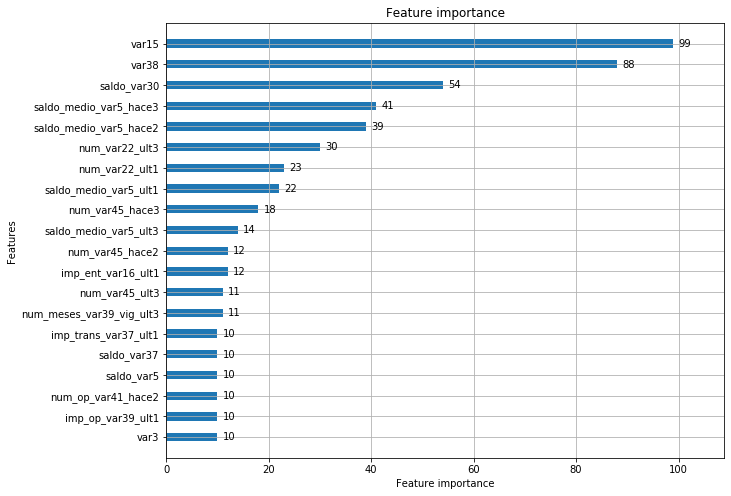

In [44]:
from lightgbm import plot_importance

fig, ax = plt.subplots(1, 1, figsize=(10, 8))
plot_importance(lgbm_clf, ax=ax, max_num_features=20, height=0.4)